# GERD weather forecast

**Introduction**


**The Grand Ethiopian Renaissance Dam (GERD)**, is a gravity dam on the Blue Nile River in Ethiopia under construction since 2011. The dam is in the Benishangul-Gumuz Region of Ethiopia, about 45 km (28 mi) east of the border with Sudan.

The primary purpose of the dam is electricity production to relieve Ethiopia's acute energy shortage and for electricity export to neighbouring countries. With a planned installed capacity of 6 gigawatts, the dam will be the largest hydroelectric power plant in Africa when completed,as well as among the 20 largest in the world with planned maximum storage capacity of 74 billion cubic meters of water.
<center>
    <img src = images/dam_1.jpeg width = 50%/>
</center>

**OVERVIEW**

In this Capstone project,I will explore an environmental weather dataset from ***World Weather for Water Data Service (W3S)*** , a repository of University of Guelph.  

# 1 -  Business Understanding / Research Question

### 1.1 - The research question

Forecast temperature and precipitation on river water sheds that can feed to the GERD dam, and prepare for plan accordingly.

Temperature affects the rate of evaporation from the water surface and transpiration from vegetation along the river. As the temperature increases, so does the rate of evaporation and transpiration, leading to a decrease in the amount of water in the rivers basins of GERD. Which can result in reduced water levels in the dam there by electric generation. 

Precipitation, on the other hand, directly affects the amount of water in the rivers. Increased precipitation, such as heavy rainfall, can lead to higher water levels and potentially cause flooding and may overwhelm the dam's storage/release capacity. On the other hand, a lack of precipitation can lead to lower water levels and drought conditions.

In addition, changes in precipitation patterns and amounts can have a long-term impact on the water cycle and the overall health of the river watersheds and there by the dam and its energey generation. 

Overall, temperature and precipitation play important roles in determining the water levels and health of a river watersheds feeding the GERD dam, and changes in these factors can have far-reaching in energy generation and ripple effects in the over all socio-economic and situation of the region.

Predict/forecast, The average Temperature, Precipitation, * Hydrometric Data* , climate prediction for GERD. The final result comes with major forecasting in locations in the GERD Basin.

***Why this question is important***

The energy generating capacity of Hydroelectric station is directly affected by the amount of water in the reservoir dam, which is directly impacted by the weather/climate conditions of the surrounding area and the river basins feeding to the Dam. So, climate forecasting for this project will help for power budget planning, how much billion meter cube water to keep/release from the dam, estimate the energy production of the station, plan for best time to schedule for maintenance of the station, over all macro/micro economic planning of the region as its tied to energy.


### 1.2 - Data Source

World Weather for Water Data Service (W3S) from a repository of University of Guelph, is a Data as a Service (DaaS) platform that allows me to download climate (precipitation, maximum temperature & minimum temperature) data for the predefined watershed along the GERD basin to develop data-driven rainfall-runoff models. I got data from 2000 and 2019 from this platform.

University of Guelph https://www.uoguelph.ca/watershed/w3s/
Data collected to GERD basin area, shown in the figure below, the red dot is the location of the GERD (Dam).


Data Source : University of Guelph https://www.uoguelph.ca/watershed/w3s/

Downloaded into multiple CSVs https://drive.google.com/drive/folders/1a1h0ZZYdGmd9dJb9ecaDezkhdN1wLvJC

<center>
    <img src = images/water_shed.png width = 50%/>
</center>

### 1.3 - The techniques used in analysis

1. This a timeseries: Data prep, Data analysis and visualizations (trend/seasonality), testing stationarity, Data transformation, review SARIMA with ACF and PACF to forecast/predict the time series,( predict the average temp and precipitation of GERD basin).using traditional/algorithmic models.

where the goal is to predict future weather conditions on the GERD basin based on past observations. Using some of the popular time series forecasting models for weather forecasting 

1. ARIMA (AutoRegressive Integrated Moving Average): ARIMA is a classic time series forecasting method that models the underlying structure in the data and uses this information to make predictions. It is well-suited for weather forecasting because it can capture both short-term and long-term patterns in the data.

2. SARIMA (Seasonal ARIMA): SARIMA is a variation of ARIMA that includes a seasonal component in the model. This makes it well-suited for weather forecasting, where there are clear seasonal patterns in the data, such as the onset and cessation of rainy seasons.
	
***The expected results***




### 1.4 - The expected results

1. With the data I have and leasson learned in the course I would expect a better prediction of temperature and precipitation the GERD basin. I couldn't find more data about Dew Point, Humidity, wind speed, visiblity, pressure which might help better imporve the quality of my model.

#notes
ARIMA Model
ARIMA Model stands for Auto-Regressive Integrated Moving Average. It is used to predict the future values of a time series using its past values and forecast errors. The below diagram shows the components of an ARIMA model: 



**Temperature Data**
- Daily Average Temperature
- Daily Max Temperature
- Daily Mean Temperature
- Annual Extereme Temperature

**Precipitation Data**
- Daily Precipitation
- Cumulative monthly precipitations
- Annual extreme precipitation


###### 1.5 -  Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import os, glob
from numpy import percentile

#visualization
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


from functools import partial
import calendar
import datetime

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor, ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error, r2_score

#time series 
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore")


# 2 - Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Load the data and familiarize with it

- See the available columns and their data-types
- Some standard details like the min, max, std-dev of the numerical variables and possible values in the categorical variables
- What percentage of data has null values. Start thinking about how to deal with them. Is there a logical way of filling the null values?
- Are there unreasonable values in the numerical variables.
- Check the histograms and distributions to understand if scaling is needed
- The standard instrument for the measurement of rainfall is the 203mm (8 inch) rain gauge.

## 2.1 - Import the dataset:

In [2]:
#use parse_date=True to make the dates column datetime type
df_temperature = pd.read_csv("data/temperature.csv", parse_dates=True, index_col='date')

In [3]:
df_temperature.shape

(2005371, 5)

In [4]:
df_precipitation = pd.read_csv("data/precipitation.csv",parse_dates=True, index_col='date')

In [5]:
df_precipitation.shape

(50051007, 4)

- Temperatture measured in degress Celsius
- Precipitaoin is measured in millimeteres based on the size of the rain guage.

In [6]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2005371 entries, 2001-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lat     float64
 1   long    float64
 2   elev    int64  
 3   tmin    float64
 4   tmax    float64
dtypes: float64(4), int64(1)
memory usage: 91.8 MB


In [7]:
df_temperature.sample(5)

,lat,long,elev,tmin,tmax
date,,,,,
2002-04-29,11.25,33.25,446,27.8,40.2
2002-01-13,10.25,38.75,2276,14.9,17.6
2003-04-15,5.75,38.75,1796,14.5,23.4
2003-01-19,11.75,38.75,2853,11.5,21.0
2005-10-10,11.25,37.25,2173,13.1,24.5


In [8]:
df_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50051007 entries, 2001-01-01 to 2019-12-31
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lat     float64
 1   long    float64
 2   elev    int64  
 3   precip  float64
dtypes: float64(3), int64(1)
memory usage: 1.9 GB


In [9]:
df_precipitation.sample(5)

,lat,long,elev,precip
date,,,,
2018-05-07,5.95,40.75,1081,0.000000
2006-05-17,6.65,33.15,422,2.159231
2001-08-07,10.25,33.95,506,0.023312
2006-02-27,4.85,38.45,1432,3.333823
2014-03-15,10.65,33.25,426,0.000000


# 2.2 - Check for missing values:

In [10]:
temp_missing_values = df_temperature.isna().sum()
print(temp_missing_values)

precipitation_missing_values = df_precipitation.isna().sum()
print(precipitation_missing_values)


lat     0
long    0
elev    0
tmin    0
tmax    0
dtype: int64
lat       0
long      0
elev      0
precip    0
dtype: int64


No missing values on both datasets.

# 2.3 - Data Cleaning:

In [11]:
print("Duplicates in temperature dataset:{} ".format(df_temperature.duplicated().sum()))
print("Duplicates in precipitation dataset:{} ".format(df_precipitation.duplicated().sum()))

Duplicates in temperature dataset:605913 
Duplicates in precipitation dataset:25382543 


Drop the duplicates

In [12]:
df_temperature.drop_duplicates(inplace=True)

In [13]:
df_precipitation.drop_duplicates(inplace=True)

In [14]:
#outliers
df_precipitation_test = df_precipitation.query('(precip > 1000)')
df_precipitation_test

,lat,long,elev,precip
date,,,,


In [16]:
df_precipitation[df_precipitation.index.year == 2001]['precip']

date
2001-01-01     0.000000
2001-01-25     0.168518
2001-03-26     0.000098
2001-03-29    12.231543
2001-04-01     1.235200
                ...    
2001-11-04     8.282775
2001-11-16     0.006492
2001-11-17     0.409580
2001-12-10     0.682689
2001-12-13     0.048087
Name: precip, Length: 1269108, dtype: float64

# 2.4 - Data summarization

2.4.1 - Temperature

In [17]:
temp_summary_stats = df_temperature.describe()
print(temp_summary_stats)

                lat          long          elev          tmin          tmax
count  1.399458e+06  1.399458e+06  1.399458e+06  1.399458e+06  1.399458e+06
mean   9.032644e+00  3.710407e+01  1.397811e+03  1.724062e+01  2.813995e+01
std    2.796948e+00  2.162934e+00  7.696254e+02  5.208960e+00  5.477076e+00
min    3.750000e+00  3.275000e+01  3.890000e+02 -7.740000e+01  2.700000e+00
25%    6.750000e+00  3.525000e+01  6.830000e+02  1.360000e+01  2.440000e+01
50%    8.750000e+00  3.725000e+01  1.302000e+03  1.730000e+01  2.800000e+01
75%    1.125000e+01  3.875000e+01  1.933000e+03  2.110000e+01  3.200000e+01
max    1.425000e+01  4.125000e+01  3.599000e+03  4.160000e+01  4.590000e+01


In [18]:
#Daily average
def daily_avg(x,y):
    return (x+y)/2

In [19]:
# df_temperature['daily_avg_temp'] = df_temperature.parallel_apply(lambda x: daily_avg(x.tmin,x.tmax), axis=1)
df_temperature['daily_avg_temp'] = df_temperature.apply(lambda x: daily_avg(x.tmin,x.tmax), axis=1)
df_temperature.sample(5)

,lat,long,elev,tmin,tmax,daily_avg_temp
date,,,,,,
2013-11-10,12.75,38.75,1640,14.0,27.0,20.50
2002-03-15,4.75,40.25,1142,20.6,32.9,26.75
2018-04-30,12.25,34.25,466,24.1,41.3,32.70
2013-02-27,13.75,36.75,687,21.4,36.0,28.70
2008-08-18,8.75,37.75,2858,10.4,14.3,12.35


Monthly mean, median, min and max temperature

In [20]:
summary_stats_temperature = df_temperature['daily_avg_temp'].resample('M').agg(['mean', 'median', 'min', 'max'])
summary_stats_temperature.sample(5)

,mean,median,min,max
date,,,,
2013-03-31,25.141307,24.95,11.10,36.80
2014-06-30,23.589130,23.25,11.65,36.55
2010-08-31,21.371723,21.35,9.25,33.30
2002-07-31,21.752678,21.45,8.70,34.75
2018-08-31,21.582137,21.65,9.90,31.45


2.4.2 - Precipitation

Monthly mean, median, min and max Precipitation

In [21]:
summary_stats_precipitation = df_precipitation['precip'].resample('M').agg(['mean', 'median', 'min', 'max'])
summary_stats_precipitation.sample(5)

,mean,median,min,max
date,,,,
2006-09-30,6.742145,3.109991,2.539170e-13,158.14308
2010-05-31,5.866281,2.382670,1.884617e-10,125.56557
2006-07-31,9.641715,4.817674,1.992583e-09,212.05867
2015-07-31,6.724761,2.842498,4.036052e-10,125.58019
2015-12-31,3.021396,1.073154,2.698725e-09,77.06234


# 2.5 - Visualization

2.5.1 - Temperature

In [22]:
#temperature grouped by Year
temperature_grouped = df_temperature.groupby(df_temperature.index.year)

In [23]:
max_temp_values = temperature_grouped.max()
mean_temp_values = temperature_grouped.mean()
min_temp_values = temperature_grouped.min()

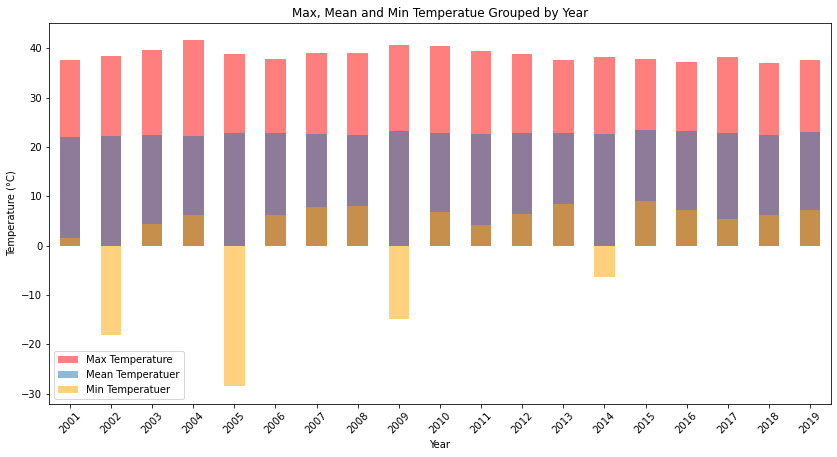

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
max_temp_values['daily_avg_temp'].plot.bar(color='red', alpha=0.5, label='Max Temperature')
mean_temp_values['daily_avg_temp'].plot.bar(alpha=0.5, label='Mean Temperatuer')
min_temp_values['daily_avg_temp'].plot.bar(color='orange',alpha=0.5, label='Min Temperatuer')

# Add a title and labels to the plot
plt.title('Max, Mean and Min Temperatue Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("./images/max_mean_min_temp_by_year.jpg");

2.5.2 - Precipitation

In [25]:
precipitation_grouped = df_precipitation.groupby(df_precipitation.index.year)

In [26]:
max_precip_values = precipitation_grouped['precip'].max()
mean_precip_values = precipitation_grouped['precip'].mean()
min_precip_values = precipitation_grouped['precip'].min()

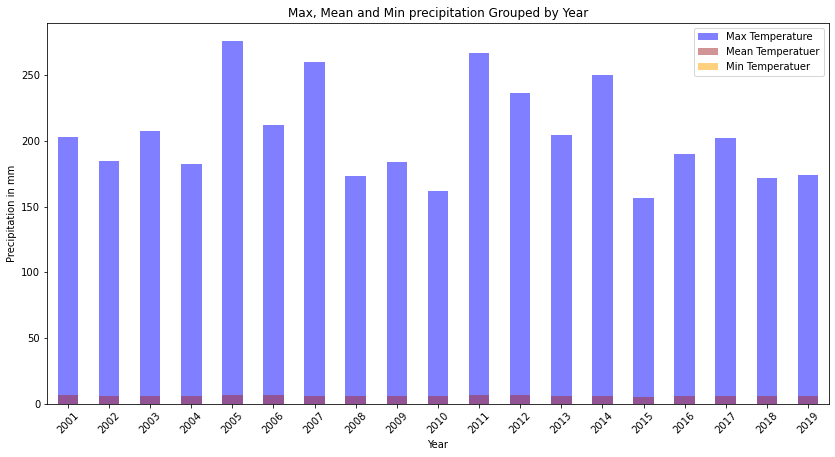

<Figure size 432x288 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))
max_precip_values.plot.bar(color='blue', alpha=0.5, label='Max Temperature')
mean_precip_values.plot.bar(color='brown', alpha=0.5, label='Mean Temperatuer')
min_precip_values.plot.bar(color='orange',alpha=0.5, label='Min Temperatuer')

# Add a title and labels to the plot
plt.title('Max, Mean and Min precipitation Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Precipitation in mm')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("./images/max_mean_min_precip_by_year.jpg");

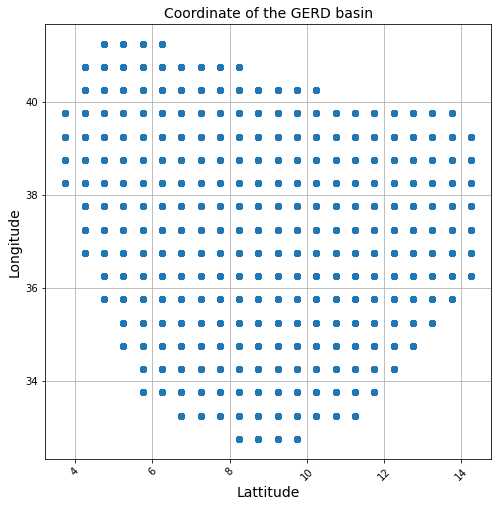

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(y=df_temperature['long'], x=df_temperature['lat'])
plt.title('Coordinate of the GERD basin',fontsize=14, loc = 'center')
plt.ylabel('Longitude',fontsize=14)
plt.xlabel('Lattitude',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()

Temperature plot with monthly mean and max

In [29]:
df_temperature_avg_monthly = df_temperature.resample('M').mean()

In [30]:
df_temperature_avg_monthly.head(5)

,lat,long,elev,tmin,tmax,daily_avg_temp
date,,,,,,
2001-01-31,8.876792,37.148409,1403.406026,13.685730,28.165547,20.925638
2001-02-28,8.888705,37.140483,1402.831109,15.198765,29.914544,22.556655
2001-03-31,8.891263,37.135964,1402.995265,17.699121,30.862864,24.280992
2001-04-30,8.882914,37.141512,1401.107613,18.294602,28.375399,23.335001
2001-05-31,8.894869,37.135734,1403.752008,18.481842,27.118837,22.800339


<Figure size 1440x288 with 0 Axes>

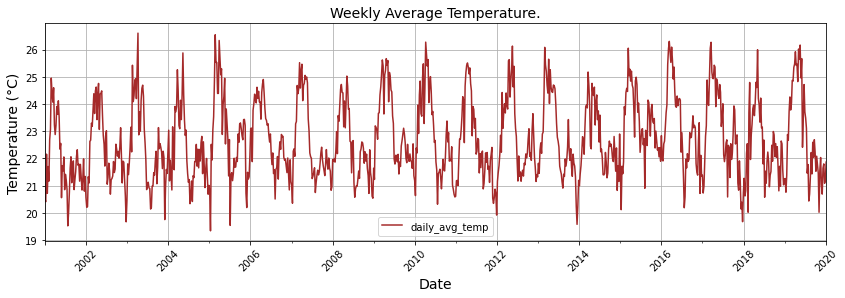

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(20,4))
df_temperature.resample('W').mean().plot(y='daily_avg_temp', kind='line',figsize=(14,4),c='brown')
plt.title('Weekly Average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/max_mean_temp.jpg");

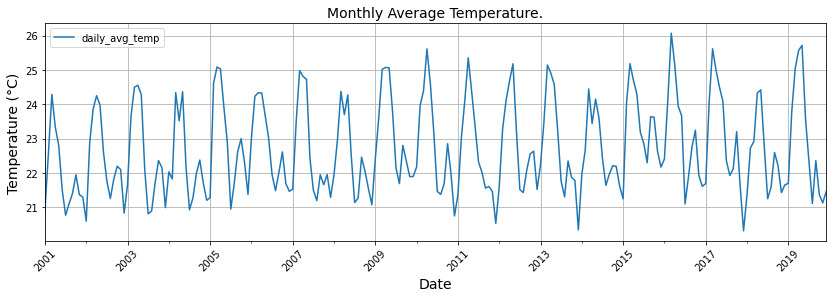

<Figure size 432x288 with 0 Axes>

In [32]:
df_temperature.resample('M').mean().plot(y='daily_avg_temp', kind='line',figsize=(14,4))
plt.title('Monthly Average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/mean_temp.jpg");

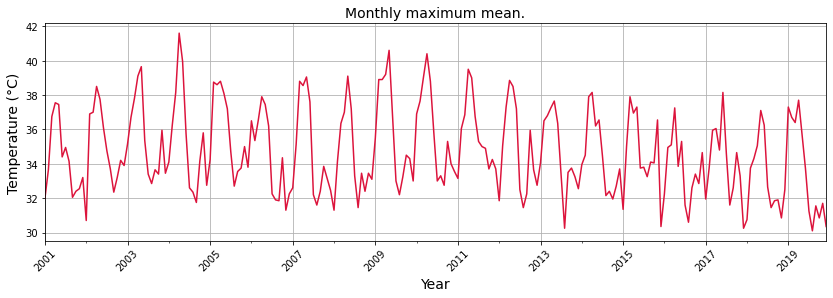

<Figure size 432x288 with 0 Axes>

In [33]:
df_temperature.resample('M').max()['daily_avg_temp'].plot(figsize=(14,4),c='crimson')
plt.title('Monthly maximum mean.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/max_temp.jpg");
# M = calendar month end
# D = one absolute day
# W = one week
# A = Year end frequency

Checking daily average temperature and precipitation in a specific time span.

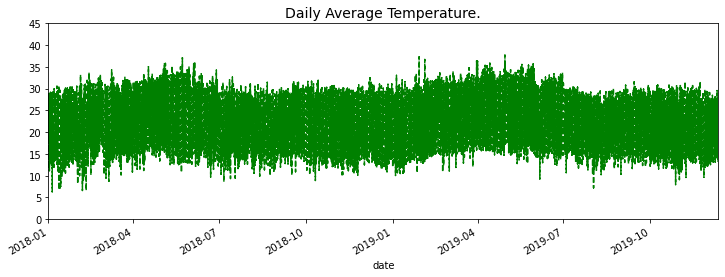

In [34]:
df_temperature['daily_avg_temp'].plot(xlim=['2018-01-01','2019-12-12'],ls='--', ylim=[0,45],kind='line', figsize=(12,4),c='green')
plt.title('Daily Average Temperature.',fontsize=14, loc = 'center')
plt.show()

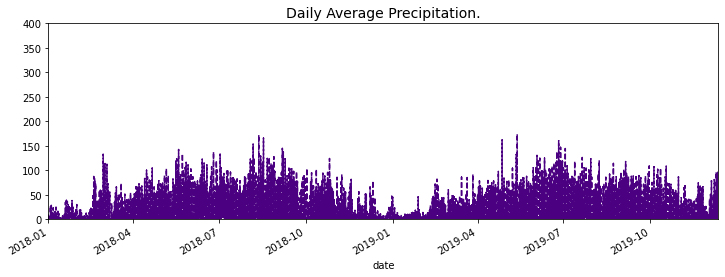

In [35]:
df_precipitation['precip'].plot(xlim=['2018-01-01','2019-12-12'],ls='--', ylim=[0,400],kind='line', figsize=(12,4),c='indigo')
plt.title('Daily Average Precipitation.',fontsize=14, loc = 'center')
plt.show()

Precipitation plot with weekly average and max

<Figure size 1440x288 with 0 Axes>

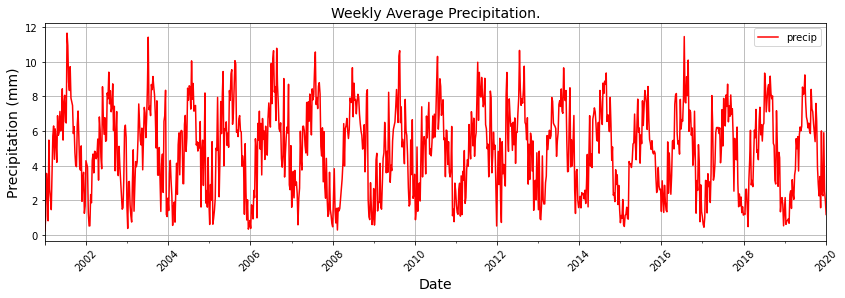

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(20,4))
df_precipitation.resample('W').mean().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Weekly Average Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/weekly_avg_precip.jpg");

Precipitation plot with monthly average and max

In [37]:
df_precipitation_avg_monthly = df_precipitation.resample('M').mean()

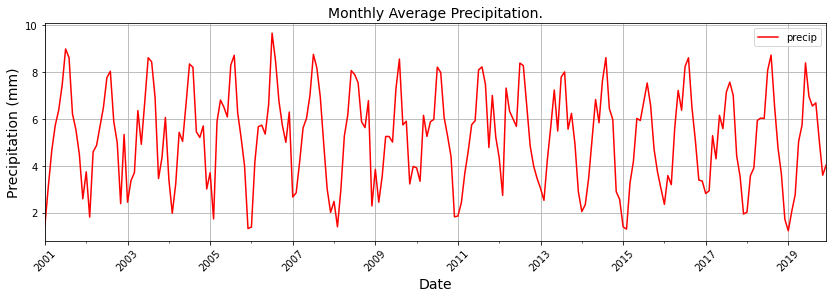

<Figure size 432x288 with 0 Axes>

In [38]:
df_precipitation.resample('M').mean().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Monthly Average Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/monthly_avg_precip.jpg");

In [ ]:
#https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

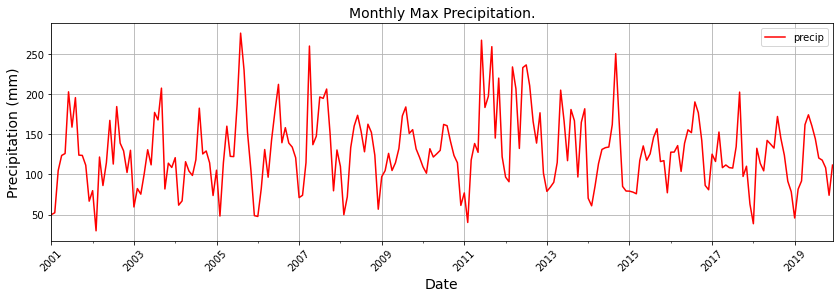

<Figure size 432x288 with 0 Axes>

In [39]:
df_precipitation.resample('M').max().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Monthly Max Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/monthly_max_precip.jpg");

# 2.6 - Identify patterns

2.6.1 - Temperature

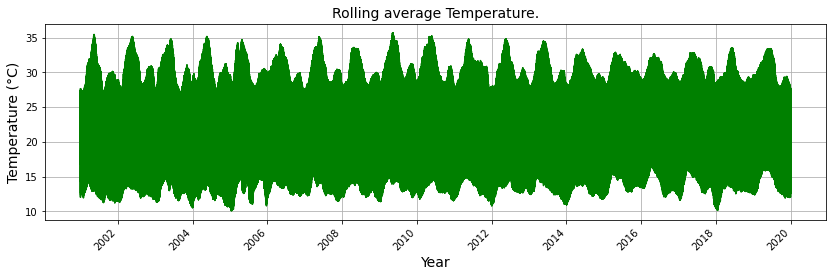

In [40]:
df_temperature['daily_avg_temp'].rolling(window=30).mean().plot(figsize=(14,4),c='green')
plt.title('Rolling average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()

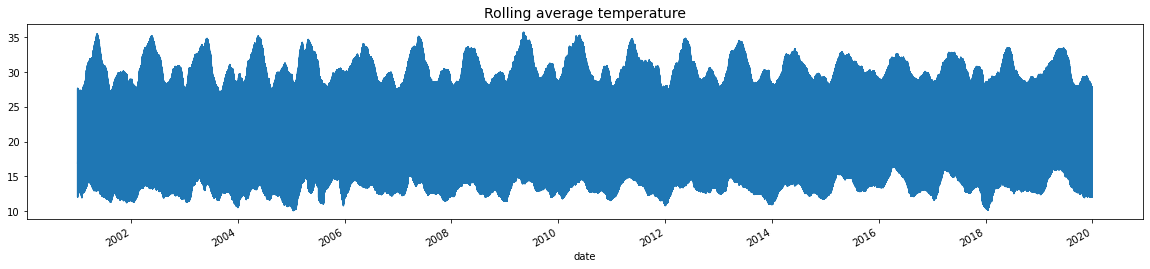

In [41]:
plt.figure(figsize=(20,4))
plt.title('Rolling average temperature',fontsize=14, loc = 'center')
df_temperature['daily_avg_temp'].rolling(window=30).mean().plot(kind='line')
plt.show()

2.6.2 - Precipitation

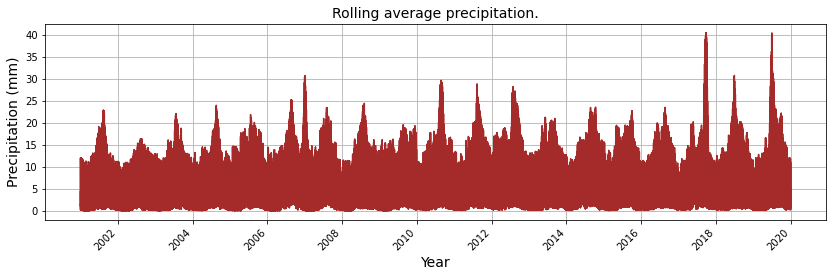

<Figure size 432x288 with 0 Axes>

In [42]:
df_precipitation['precip'].rolling(window=30).mean().plot(figsize=(14,4),c='brown')
plt.title('Rolling average precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/rolling_avg_precip.jpg");

- An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths. A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

- Autocorrelation Function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient againist the lag, which is measured interms of a number of periods of units.

- ACF stands for Autocorrelation Function, and it is a measure of the correlation between a time series and its lagged values. In other words, the ACF measures how closely the values at time t are related to the values at time t-k, where k is the number of lags. The ACF can help identify patterns in the data such as seasonality and help determine the appropriate lag order for modeling the time series.

- The ACF plot shows the correlation between the time series and its lagged values, while the

- The PACF plot shows the partial correlation between the time series and its lagged values, after accounting for the intermediate lags. 

- The plots can be used to identify significant correlations and help choose appropriate modeling techniques for the time series.


2.6.3 - Autocorrelation Function (ACF) and Partial ACF (ACF) - Temperature

With monthly average data

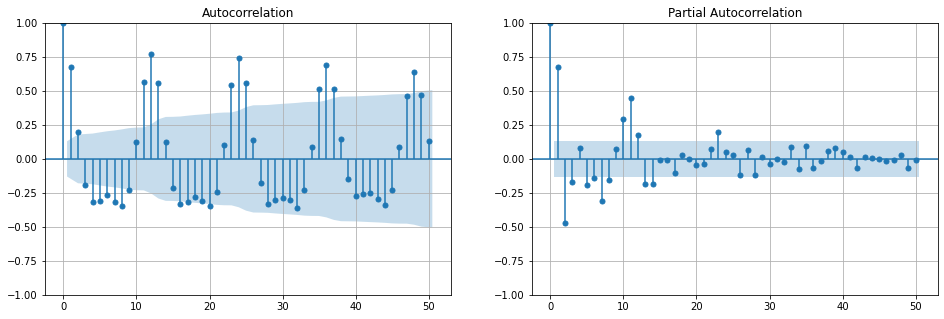

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_temperature_avg_monthly['daily_avg_temp'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_temperature_avg_monthly['daily_avg_temp'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_temp_monthly.jpg");

With weekly average data

In [47]:
df_temperature_avg_weekly = df_temperature.resample('W').mean()

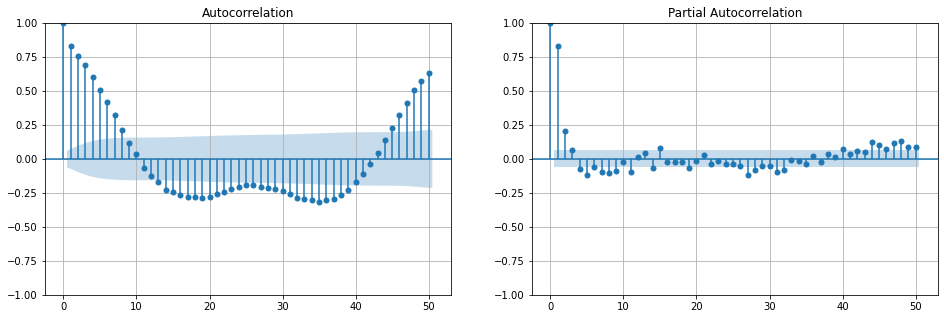

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_temperature_avg_weekly['daily_avg_temp'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_temperature_avg_weekly['daily_avg_temp'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_temp_monthly.jpg");

2.6.4 - Autocorrelation Function (ACF) and Partial ACF (ACF) - Precipitation

With monthly average data

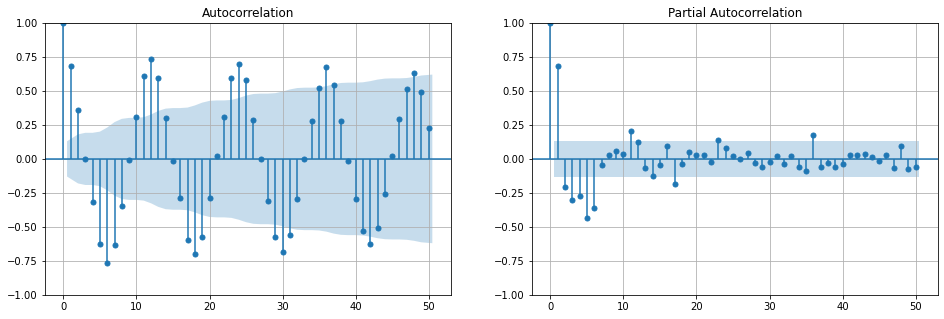

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_precipitation_avg_monthly['precip'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_precipitation_avg_monthly['precip'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_precip_monthly.jpg");

With weekly average

In [49]:
df_precipitation_avg_weekly = df_precipitation.resample('W').mean()

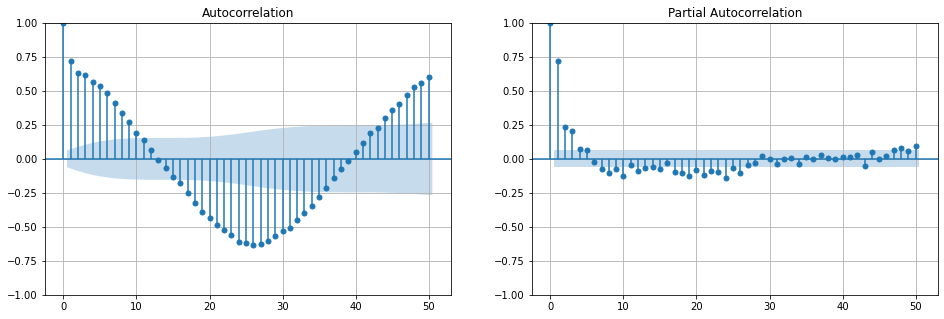

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_precipitation_avg_weekly['precip'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_precipitation_avg_weekly['precip'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_precip_weekly.jpg");

# 2.7 - Stationarity

- A time series where its statistical properties, such as mean, variance, and autocovariance, are constant over time.

- Stationarity is an important assumption in many time series analysis methods, such as time series forecasting, as it allows for meaningful modeling of the underlying patterns and relationships in the data. When a time series is non-stationary, its statistical properties may change over time, making it more difficult to model and forecast.

- To determine whether a time series is stationary, various statistical tests can be performed, such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. If a time series is found to be non-stationary, it can be made stationary through techniques such as differencing, which involves subtracting consecutive values of the time series to remove trends, or by transforming the time series using log or square root transformations.

- In this task I will use ADF to check stationarity of my dataset.


2.7.1 - Stationarity - Temperature

In [51]:
result = adfuller(df_temperature_avg_monthly['daily_avg_temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.4034458214683827
p-value: 0.010841963180595719


In [57]:
ans = 'Stationay' if adfuller(df_temperature_avg_monthly['daily_avg_temp'])[1] < 0.01 else 'Non-Stationary'
ans

'Non-Stationary'

2.7.2 - Stationarity - Precipitation

In [52]:
result = adfuller(df_precipitation_avg_monthly['precip'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.89980147669657
p-value: 0.00203630861439414


In [58]:
ans = 'Stationay' if adfuller(df_precipitation_avg_monthly['precip'])[1] < 0.01 else 'Non-Stationary'
ans

'Stationay'

# 2.8 - Decompose dataset

The dataset have negative vlaues for temprature so, I will use a decomposition method that is specifically designed for time series data with ***negative values***, such as the seasonal and trend decomposition using loess (STL) algorithm. This method is based on locally weighted regression, and it can effectively capture the underlying trend, seasonal, and residual components in a time series, even when negative values are present.

Decompose the temperature and precipitation into its constituent components.
- Trend: underlying long-term direction of the data.
- Seasonality: The repeating patterns that occur at regular intervals (daily, weekly, yearly)
- Cyclical: The fluctuatins in the data that occur due to economic or other external factors.



In [53]:
#decomposed time series data
res_temp = sm.tsa.seasonal_decompose(df_temperature_avg_monthly['daily_avg_temp'],model='additive', period=12)
# You can also access each component separately by accessing the result.trend, result.seasonal, and result.resid attributes.

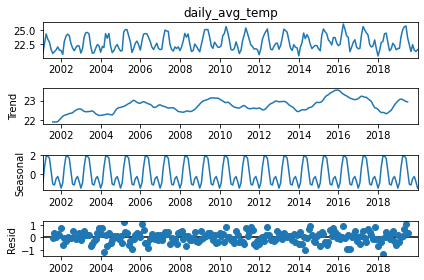

In [54]:
#plt.figure(figsize=(20,4))
resplot = res_temp.plot()
plt.savefig("./images/decompose_temp.jpg");

In [55]:
res_precip = sm.tsa.seasonal_decompose(df_precipitation_avg_monthly['precip'],model='additive', period=12)

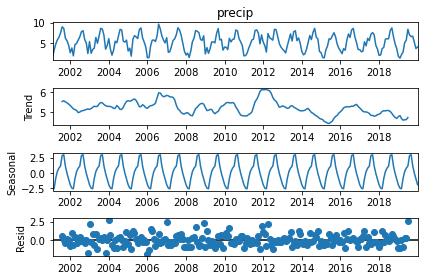

In [56]:
resplot = res_precip.plot()
plt.savefig("./images/decompose_precip.jpg");

##End of Exploratory Data Analysis (EDA) for a timeseries weather dataset

In [ ]:
## Advanced
## These examples use some more advanced techniques, such as resampling the data, filling missing values using forward fill (ffill), and differencing the data to make it stationary. 


